In [16]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [2]:
# as shown in later analysis, only consider 13:15:00 - 15:00:00 time range
afternoon_start = ' 13:15:00'
morning_start = ' 09:45:00'
morning_end = ' 11:45:00'
morning_early_end = ' 11:25:00'
afternoon_end = ' 15:45:00'
afternoon_early_end = ' 14:55:00'


In [3]:
hsi_df = pd.read_excel(os.path.join("dataset", "HSI_min_20250201-20250430.xlsx"),
                   index_col="index")
hsi_df['datetime'] = pd.to_datetime(hsi_df['date'] + ' ' + hsi_df['time'])
hsi_df = hsi_df.set_index('datetime')
hsi_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-03 09:30:00,2025-02-03,2025-02-03,09:30:00,20048.87,20048.87,20048.87,20048.87,210367186
2025-02-03 09:31:00,2025-02-03,2025-02-03,09:31:00,20040.03,20125.38,20040.03,20125.38,233333295
2025-02-03 09:32:00,2025-02-03,2025-02-03,09:32:00,20120.99,20129.47,20098.00,20098.00,85137616
2025-02-03 09:33:00,2025-02-03,2025-02-03,09:33:00,20097.95,20097.95,19996.73,20040.94,101702443
2025-02-03 09:34:00,2025-02-03,2025-02-03,09:34:00,20039.30,20039.30,20005.90,20014.28,66246961


In [4]:
hsfi_df = pd.read_excel(os.path.join("dataset", "HSFI_min_20250201-20250430.xlsx"),
                   index_col="index")
hsfi_df['datetime'] = pd.to_datetime(hsfi_df['date'] + ' ' + hsfi_df['time'])
hsfi_df = hsfi_df.set_index('datetime')
hsfi_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-03 09:16:00,2025-02-03,2025-02-03,09:16:00,20030,20044,19851,19949,2217
2025-02-03 09:17:00,2025-02-03,2025-02-03,09:17:00,19953,19985,19908,19980,1143
2025-02-03 09:18:00,2025-02-03,2025-02-03,09:18:00,19977,19982,19930,19934,771
2025-02-03 09:19:00,2025-02-03,2025-02-03,09:19:00,19929,19975,19913,19935,649
2025-02-03 09:20:00,2025-02-03,2025-02-03,09:20:00,19935,20018,19924,20016,906


In [5]:
hscat100_df = pd.read_excel(os.path.join("dataset", "HSCAT100_min_20250201-20250430.xlsx"),
                   index_col="index")
hscat100_df['datetime'] = pd.to_datetime(hscat100_df['date'] + ' ' + hscat100_df['time'])
hscat100_df = hscat100_df.set_index('datetime')
hscat100_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-05 09:30:00,2025-02-05,2025-02-05,09:30:00,8715.55,8715.55,8715.55,8715.55,0
2025-02-05 09:31:00,2025-02-05,2025-02-05,09:31:00,8713.09,8714.97,8661.06,8661.06,8276545280
2025-02-05 09:32:00,2025-02-05,2025-02-05,09:32:00,8660.70,8660.70,8639.34,8640.56,4040869984
2025-02-05 09:33:00,2025-02-05,2025-02-05,09:33:00,8638.88,8644.66,8638.23,8644.29,2410900032
2025-02-05 09:34:00,2025-02-05,2025-02-05,09:34:00,8643.34,8643.34,8639.14,8640.21,2063066672


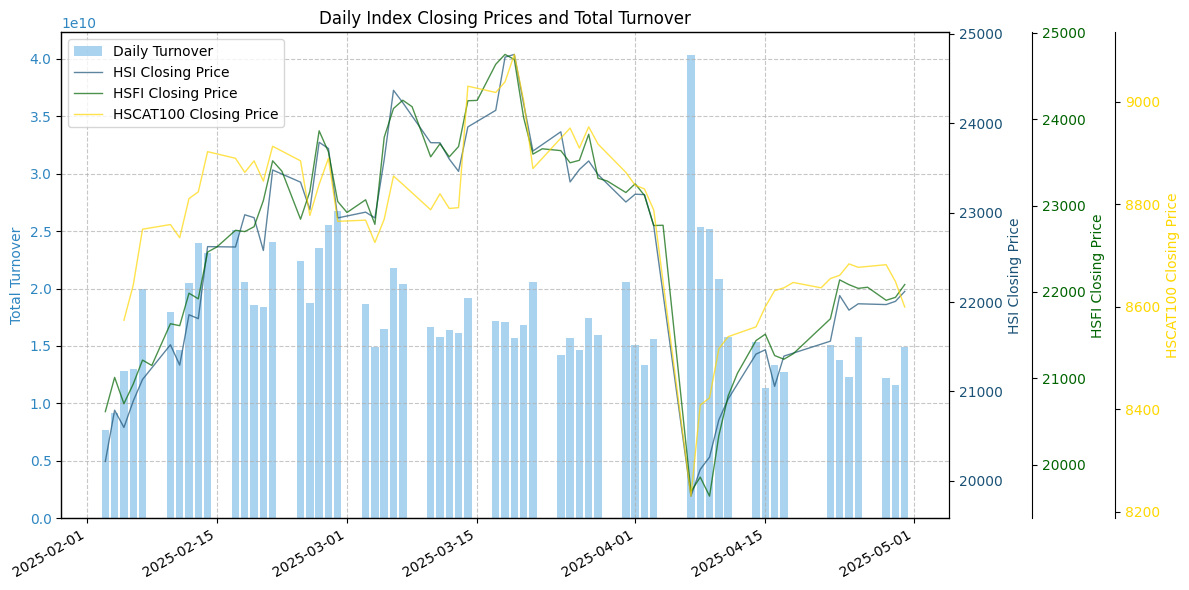

In [6]:
hsi_df['returns'] = hsi_df['close'].pct_change()
hsi_df.dropna(inplace=True) # Remove NaN from first return

# Resample to daily frequency
daily_hsi_df = hsi_df.resample('D').agg({
    'close': 'last',
    'turnover': 'sum'
}).dropna()

daily_hsfi_df = hsfi_df.resample('D').agg({'close': 'last'}).dropna()
daily_hscat100_df = hscat100_df.resample('D').agg({'close': 'last'}).dropna()

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create secondary axis for turnover
ax1.bar(daily_hsi_df.index, daily_hsi_df['turnover'], 
        color='#85c1e9', 
        alpha=0.7,
        width=0.8,
        label='Daily Turnover')
ax1.set_ylabel('Total Turnover', color='#2e86c1')
ax1.tick_params(axis='y', labelcolor='#2e86c1')

# Plot HSI Closing Price
ax2 = ax1.twinx()
ax2.plot(daily_hsi_df.index, daily_hsi_df['close'], 
         color='#1a5276', 
         linewidth=1,
         alpha=0.7,
         label='HSI Closing Price')
ax2.set_ylabel('HSI Closing Price', color='#1a5276')
ax2.tick_params(axis='y', labelcolor='#1a5276')

# Plot HSFI Closing Price (Deep Green)
ax3 = ax1.twinx()
ax3.plot(daily_hsfi_df.index, daily_hsfi_df['close'], 
         color='#006400', 
         linewidth=1,
         alpha=0.7,
         label='HSFI Closing Price')
ax3.set_ylabel('HSFI Closing Price', color='#006400')
ax3.tick_params(axis='y', labelcolor='#006400')
ax3.spines['right'].set_position(('outward', 60))

# Plot HSCAT100 Closing Price (Deep Yellow)
ax4 = ax1.twinx()
ax4.plot(daily_hscat100_df.index, daily_hscat100_df['close'], 
         color='#FFD700', 
         linewidth=1,
         alpha=0.7,
         label='HSCAT100 Closing Price')
ax4.set_ylabel('HSCAT100 Closing Price', color='#FFD700')
ax4.tick_params(axis='y', labelcolor='#FFD700')
ax4.spines['right'].set_position(('outward', 120))

# Formatting
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Daily Index Closing Prices and Total Turnover')
ax1.grid(True, linestyle='--', alpha=0.7)
fig.autofmt_xdate()

# Combine legends
lines = []
labels = []
for ax in [ax1, ax2, ax3, ax4]:
    ax_lines, ax_labels = ax.get_legend_handles_labels()
    lines.extend(ax_lines)
    labels.extend(ax_labels)
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
# pick only the timestamps common to all three
common_idx = (hsi_df.index
                .intersection(hsfi_df.index)
                .intersection(hscat100_df.index))

# slice each series down to that index
hsi_close   = hsi_df.loc[common_idx,   "close"]
hsfi_close  = hsfi_df.loc[common_idx,  "close"]
hscat_close = hscat100_df.loc[common_idx, "close"]

# build your DataFrame
close_df_day = pd.DataFrame({
    "datetime": common_idx,
    "hsi":      hsi_close.values,
    "hsfi":     hsfi_close.values,
    "hscat100": hscat_close.values
})

close_df = pd.DataFrame({"hsi": hsi_df["close"],
                        "hsfi": hsfi_df["close"],
                        "hscat100": hscat100_df["close"]})
close_df = (close_df - close_df.min()) / (close_df.max() - close_df.min())

turnover_df = pd.DataFrame({"hsi": hsi_df["turnover"],
                        "hsfi": hsfi_df["turnover"],
                        "hscat100": hscat100_df["turnover"]})
turnover_df = (turnover_df - turnover_df.min()) / (turnover_df.max() - turnover_df.min())

# Compute Covariance Matrix
cov_matrix_all_days = close_df.cov()
print("Price Covariance Matrix:\n", cov_matrix_all_days)

# Compute Correlation Matrix
corr_matrix_all_days = close_df.corr()
print("\nPrice Correlation Matrix:\n", corr_matrix_all_days)
print("\n")

# Compute Covariance Matrix
turnover_cov_matrix_all_days = turnover_df.cov()
print("Turnover Covariance Matrix:\n", turnover_cov_matrix_all_days)

# Compute Correlation Matrix
turnover_corr_matrix_all_days = turnover_df.corr()
print("\nTurnover Correlation Matrix:\n", turnover_corr_matrix_all_days)


Price Covariance Matrix:
                hsi      hsfi  hscat100
hsi       0.052758  0.051238  0.031611
hsfi      0.051238  0.049742  0.030970
hscat100  0.031611  0.030970  0.026220

Price Correlation Matrix:
                hsi      hsfi  hscat100
hsi       1.000000  0.999730  0.875477
hsfi      0.999730  1.000000  0.880773
hscat100  0.875477  0.880773  1.000000


Turnover Covariance Matrix:
                hsi      hsfi  hscat100
hsi       0.000312  0.000529  0.000286
hsfi      0.000529  0.002731  0.001477
hscat100  0.000286  0.001477  0.001284

Turnover Correlation Matrix:
                hsi      hsfi  hscat100
hsi       1.000000  0.479596  0.443051
hsfi      0.479596  1.000000  0.660081
hscat100  0.443051  0.660081  1.000000


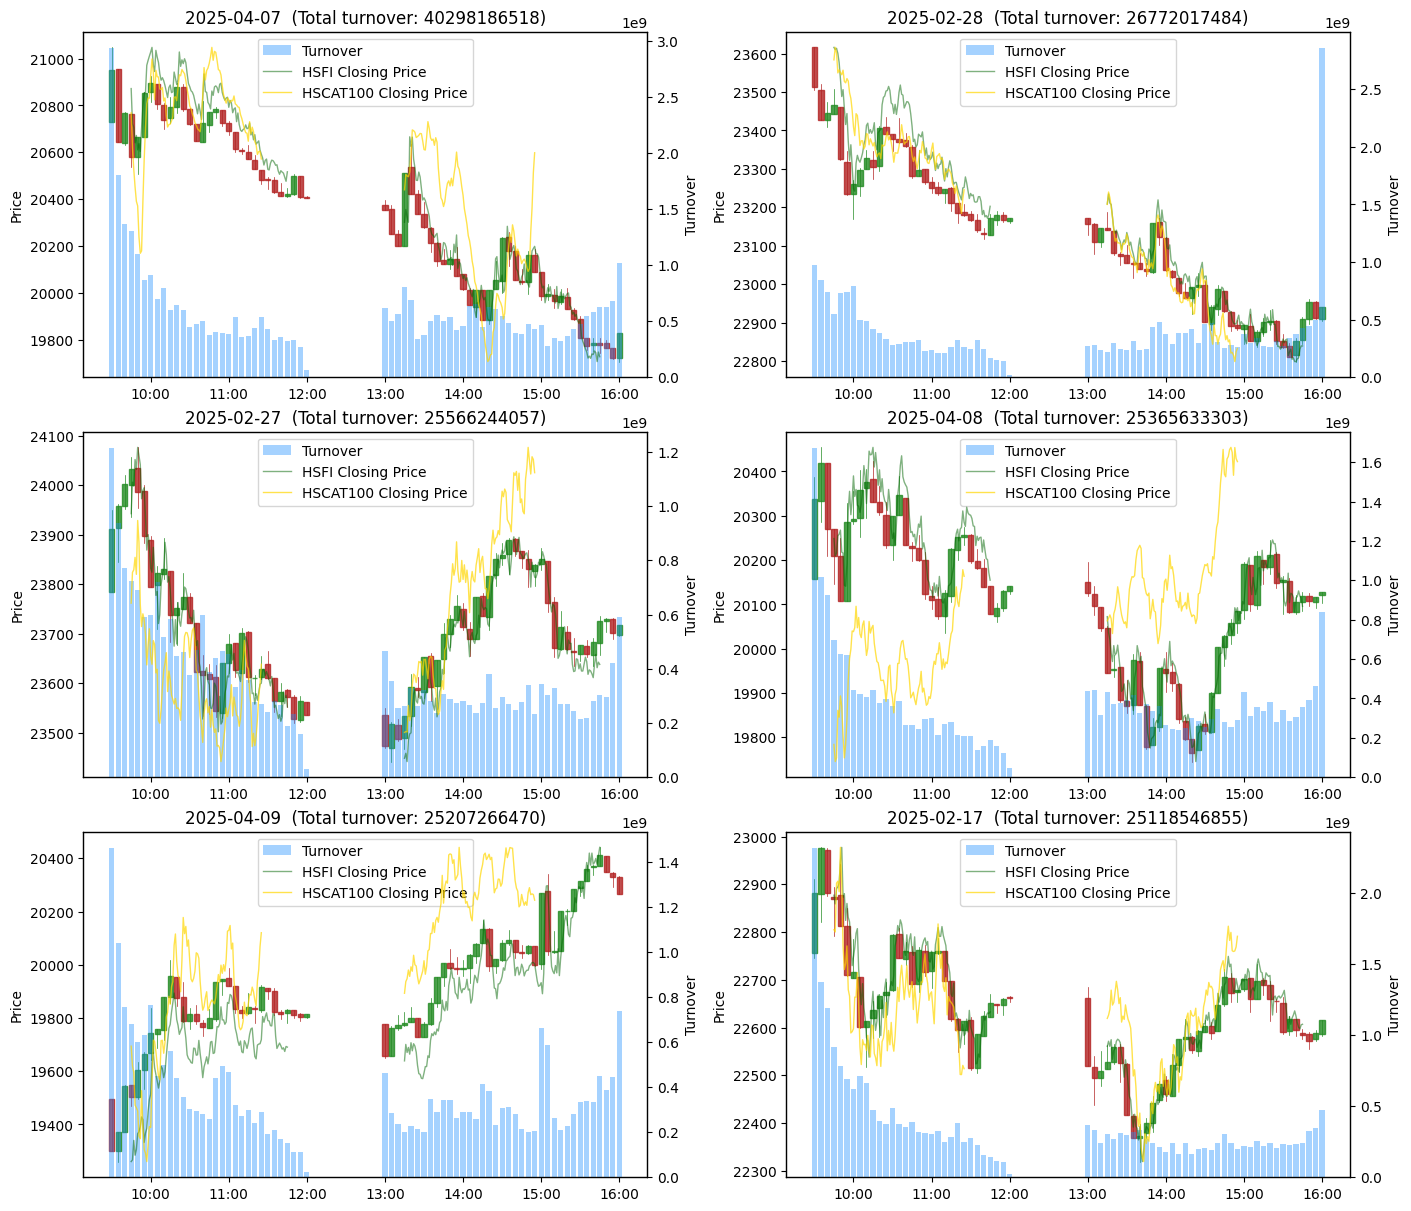

In [8]:
from utils import plot_intraday_three_curves

plot_intraday_three_curves(hsi_df, hsfi_df, hscat100_df)

In [9]:
# Assuming 'df' has a DateTimeIndex and a column 'value' with the data points
df = hsi_df

date_range = df.resample('D').sum().index.date


close_df_day_corrs:list = []
for i in range(len(date_range) - 1):
    curr_date = date_range[i]
    next_date = date_range[i + 1]
    curr_mor_df = df[df.index.date == curr_date]
    curr_mor = curr_mor_df.between_time(morning_start.strip(), morning_end.strip())['close']
    curr_aft_df = df[df.index.date == curr_date]
    curr_aft = curr_aft_df.between_time(afternoon_start.strip(), afternoon_end.strip())['close']
    next_aft_df = df[df.index.date == next_date]
    next_aft = next_aft_df.between_time(afternoon_start.strip(), afternoon_end.strip())['close']
    
    min_len = min(len(curr_mor), len(curr_aft), len(next_aft))
    if min_len == 0:
        continue

    curr_mor_trunc = curr_mor.iloc[:min_len]
    curr_aft_trunc = curr_aft.iloc[:min_len]
    next_aft_trunc = next_aft.iloc[:min_len]

    close_df_day = pd.DataFrame({"today_morning": curr_mor_trunc.values,
                "today_afternoon": curr_aft_trunc.values,
                "next_afternoon": next_aft_trunc.values})
    close_df_day_corr = close_df_day.corr()
    close_df_day_corrs.append(np.array(np.abs(close_df_day_corr.values)))

close_df_day_corr_mean = np.nanmean(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_var = np.nanvar(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_mean_df = pd.DataFrame(close_df_day_corr_mean, 
                   index=["today_morning", 'today_afternoon', 'next_afternoon'], 
                   columns=["today_morning", 'today_afternoon', 'next_afternoon'], )
close_df_day_corr_var_df = pd.DataFrame(close_df_day_corr_var, 
                   index=["today_morning", 'today_afternoon', 'next_afternoon'], 
                   columns=["today_morning", 'today_afternoon', 'next_afternoon'], )
print("\nHSI Time Range Correlation Mean")
print(close_df_day_corr_mean_df)
print("\nHSI Time Range Correlation Var")
print(close_df_day_corr_var_df)


HSI Time Range Correlation Mean
                 today_morning  today_afternoon  next_afternoon
today_morning         1.000000         0.381097        0.396817
today_afternoon       0.381097         1.000000        0.391814
next_afternoon        0.396817         0.391814        1.000000

HSI Time Range Correlation Var
                 today_morning  today_afternoon  next_afternoon
today_morning         0.000000         0.065061        0.071668
today_afternoon       0.065061         0.000000        0.068610
next_afternoon        0.071668         0.068610        0.000000


In [10]:
# Assuming 'df' has a DateTimeIndex and a column 'value' with the data points
df = hsi_df

date_range = df.resample('D').sum().index.date

close_df_day_corrs:list = []
for date in date_range:
    hsi_df_day = hsi_df[hsi_df.index.date == date]
    hsfi_df_day = hsfi_df[hsfi_df.index.date == date]
    hscat100_df_day = hscat100_df[hscat100_df.index.date == date]

    close_df_day = pd.DataFrame({"hsi": hsi_df_day["close"],
                        "hsfi": hsfi_df_day["close"],
                        "hscat100": hscat100_df_day["close"]})

    # Compute Correlation Matrix
    close_df_day_corr = close_df_day.corr()
    close_df_day_corrs.append(np.array(np.abs(close_df_day_corr.values)))

close_df_day_corr_mean = np.nanmean(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_var = np.nanvar(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_mean_df = pd.DataFrame(close_df_day_corr_mean, 
                   index=["hsi", 'hsfi', 'hscat100'], 
                   columns=["hsi", 'hsfi', 'hscat100'], )
close_df_day_corr_var_df = pd.DataFrame(close_df_day_corr_var, 
                   index=["hsi", 'hsfi', 'hscat100'], 
                   columns=["hsi", 'hsfi', 'hscat100'], )
print("\nIntraday Correlation Mean")
print(close_df_day_corr_mean_df)
print("\nIntraday Correlation Var")
print(close_df_day_corr_var_df)


Intraday Correlation Mean
               hsi      hsfi  hscat100
hsi       1.000000  0.996489  0.665125
hsfi      0.996489  1.000000  0.664313
hscat100  0.665125  0.664313  1.000000

Intraday Correlation Var
               hsi      hsfi  hscat100
hsi       0.000000  0.000007  0.051124
hsfi      0.000007  0.000000  0.050304
hscat100  0.051124  0.050304  0.000000


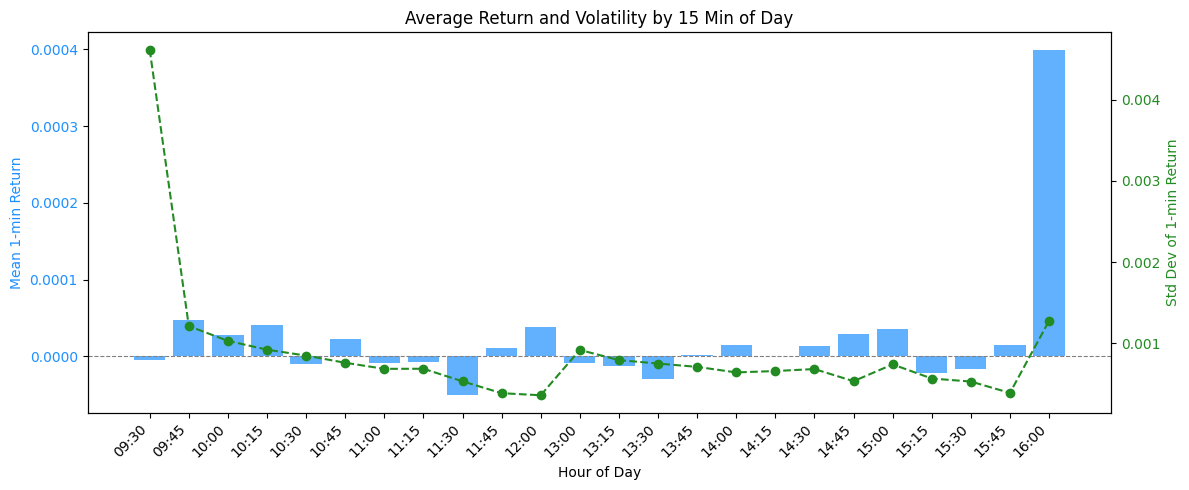

In [11]:
from utils import plot_ave_returns_and_volatility

plot_ave_returns_and_volatility(hsi_df)

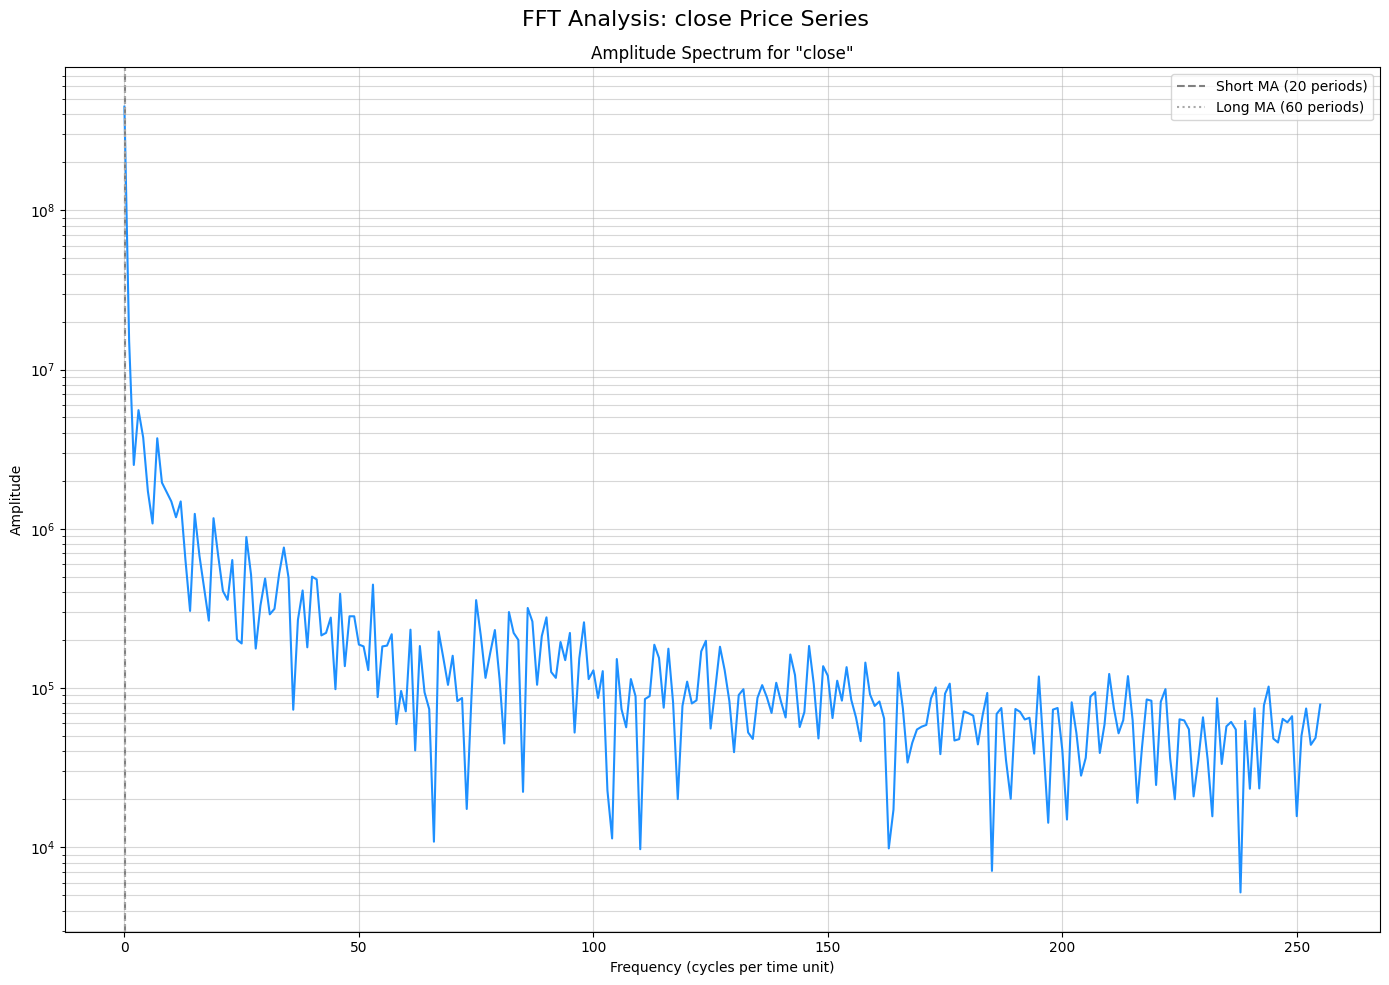

(<Figure size 1400x1000 with 1 Axes>,
 <Axes: title={'center': 'Amplitude Spectrum for "close"'}, xlabel='Frequency (cycles per time unit)', ylabel='Amplitude'>)

In [12]:
from utils import plot_fft_analysis

plot_fft_analysis(hsi_df)

## Skewness: Measures the asymmetry of the probability distribution.

### Skewness Types

#### Zero Skewness (Symmetric)

The distribution is balanced on both sides of the mean (e.g., a normal distribution). Positive and negative deviations from the mean are equally likely.

#### Positive Skewness (Right-Skewed)

The right tail is longer or fatter than the left tail. This means there are more frequent small losses and a few large gains. The mean is typically greater than the median.
Visual: Bulk of data on the left, long tail to the right.

#### Negative Skewness (Left-Skewed)

The left tail is longer or fatter than the right tail. This means there are more frequent small gains and a few large losses (e.g., market crashes). The mean is typically less than the median.
Visual: Bulk of data on the right, long tail to the left. Financial asset returns often exhibit negative skewness.

### Skewness Interpretation on Results

Highly Negative Skewness: Across all aggregation levels (1-min, 5-min, 10-min, 30-min), the skewness is strongly negative.

* This means the distribution of HSI returns has a significantly longer or fatter left tail compared to its right tail. In practical terms:
* There's a higher probability of large, sudden negative returns (market drops, "crashes") than large positive returns ("rallies" of similar magnitude).
* Small positive returns might be more frequent, but when large moves occur, they are disproportionately to the downside.
* This is a common characteristic of equity markets, often described as "markets take the stairs up and the elevator down."

## Kurtosis

Measures the "tailedness" or "peakedness" of the distribution compared to a normal distribution. It tells us about the propensity for extreme outliers.

### Kurtosis Types

#### Mesokurtic (Kurtosis = 3, or Excess Kurtosis = 0)

This is the kurtosis of a normal distribution. Tails behave as expected under normality.

#### Leptokurtic (Kurtosis > 3, or Excess Kurtosis > 0)

The distribution has "fatter tails" and a sharper peak than a normal distribution. This means extreme values (both positive and negative) are more likely than a normal distribution would predict. Many financial returns are leptokurtic.
Visual: Sharper peak, fatter tails. More probability mass in the tails and at the center.

#### Platykurtic (Kurtosis < 3, or Excess Kurtosis < 0)

The distribution has "thinner tails" and a flatter peak than a normal distribution. Extreme values are less likely. This is less common for financial returns.
Visual: Flatter peak, thinner tails.

### Excess Kurtosis Interpretation on Results

Extremely High Positive Excess Kurtosis (Leptokurtosis): All reported excess kurtosis values are massively positive.

* Extreme events (both very large gains and, especially given the negative skew, very large losses) are far more likely to occur than a normal distribution would predict.
* The market experiences more "surprises" or outliers than would be expected if returns followed a bell curve.
* Standard deviation, if used alone assuming normality, would severely underestimate the likelihood and magnitude of extreme price movements.

In [13]:
skew_return = hsi_df['returns'].skew()
print(f"Skewness of 1-min Returns: {skew_return:.4f}")
skew_return = hsi_df['returns'].resample("5min").sum().skew()
print(f"Skewness of 5-min Returns: {skew_return:.4f}")
skew_return = hsi_df['returns'].resample("10min").sum().skew()
print(f"Skewness of 10-min Returns: {skew_return:.4f}")
skew_return = hsi_df['returns'].resample("30min").sum().skew()
print(f"Skewness of 30-min Returns: {skew_return:.4f}")

kurt_return = hsi_df['returns'].kurtosis()
print(f"Excess Kurtosis of 1-min Returns: {kurt_return:.4f}")
kurt_return = hsi_df['returns'].resample("5min").sum().kurtosis()
print(f"Excess Kurtosis of 5-min Returns: {kurt_return:.4f}")
kurt_return = hsi_df['returns'].resample("10min").sum().kurtosis()
print(f"Excess Kurtosis of 10-min Returns: {kurt_return:.4f}")
kurt_return = hsi_df['returns'].resample("30min").sum().kurtosis()
print(f"Excess Kurtosis of 30-min Returns: {kurt_return:.4f}")

Skewness of 1-min Returns: -22.0077
Skewness of 5-min Returns: -16.7022
Skewness of 10-min Returns: -18.7035
Skewness of 30-min Returns: -8.4538
Excess Kurtosis of 1-min Returns: 1780.1945
Excess Kurtosis of 5-min Returns: 1464.1094
Excess Kurtosis of 10-min Returns: 1254.3934
Excess Kurtosis of 30-min Returns: 375.3327


## Stationarity Test (ADF)

* Rapid Decay: If the ACF bars quickly fall within the confidence interval (e.g., after 2-3 lags for 1-min data), it means there's little short-term linear predictability. A very short MA (e.g., 3-5 periods) might be used just to smooth out high-frequency noise.
* Significant Spikes: If you see a statistically significant spike at lag k that stands out, it might suggest a cyclical component or dependence at that lag. An MA of length k or k/2 could be considered to capture this. However, such clear, exploitable patterns are rare in ACF of returns for liquid markets.

$$
r_k = \frac{\sum_{t=k+1}^{N} (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^{N} (Y_t - \bar{Y})^2}
$$

where

* $N$ is the number of observations in the series.
* $\overline{Y}$ is the sample mean of the series.
* $Y_t$ is the value of the series at time 
* $Y_{t-k}$ is the value of the series at time $t-k$ ($k$ periods before $t$)
* The numerator is proportional to the sample autocovariance at lag $k$.
* The denominator is proportional to the sample variance of the series (autocovariance at lag $0$).

For the result $r_k$:

* $r_k\approx \pm 1$: Strong positive/negative linear relationship
* $r_k\approx 0$: Weak linear relationship



--- ACF/PACF Analysis for 1-min Returns ---


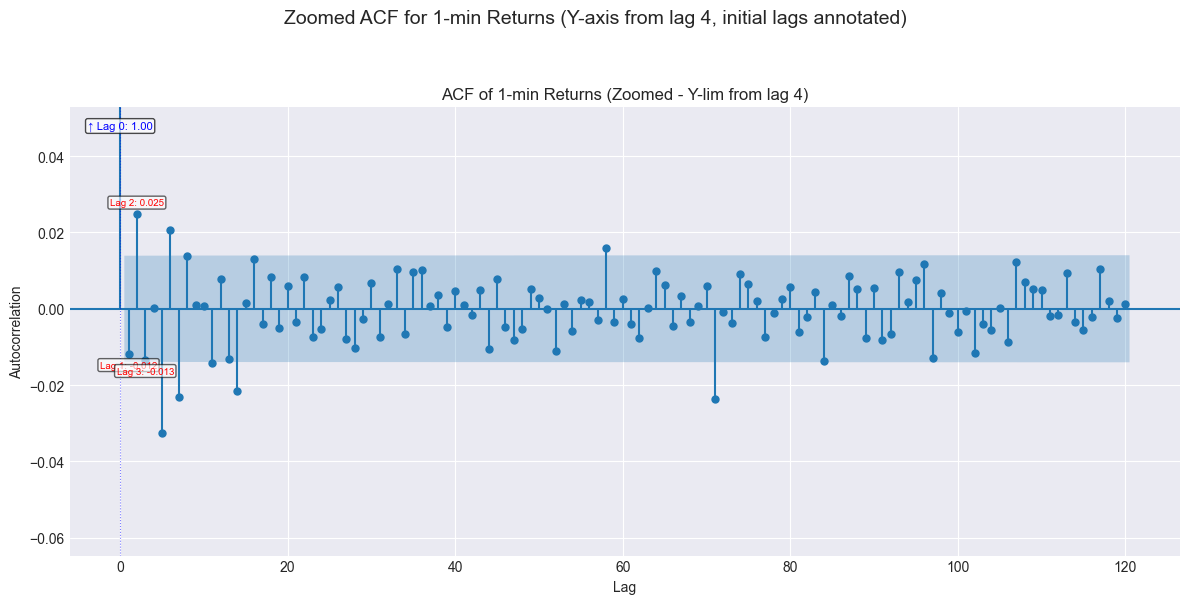

In [27]:
from utils import plot_zoomed_acf_with_annotations


lags_ignored_zoom = 3 # For y-limit calculation in zoomed ACF plots
nlags_main = 120

# Analysis for Returns
print("\n\n--- ACF/PACF Analysis for 1-min Returns ---")
plot_zoomed_acf_with_annotations(hsi_df['returns'], '1-min Returns', nlags=nlags_main, lags_to_ignore_for_ylim=lags_ignored_zoom)



Sample of calculated ROCs:
                     ROC_3min  ROC_5min  ROC_10min  ROC_20min  ROC_60min
datetime                                                                
2025-04-30 15:56:00  0.054468  0.048670   0.112443   0.104053   0.095528
2025-04-30 15:57:00  0.057133  0.074621   0.109253   0.113924   0.107757
2025-04-30 15:58:00  0.075094  0.102371   0.125446   0.126444   0.115245
2025-04-30 15:59:00  0.119874  0.163251   0.161392   0.182164   0.194005
2025-04-30 16:00:00  0.081760  0.122803   0.147327   0.164515   0.180529
ROC_3min 
            - 5th percentile: -0.222%, 95th percentile: 0.220%
            - 15th percentile: -0.121%, 85th percentile: 0.119%
            - 25th percentile: -0.070%, 75th percentile: 0.073%
          
ROC_5min 
            - 5th percentile: -0.294%, 95th percentile: 0.294%
            - 15th percentile: -0.158%, 85th percentile: 0.156%
            - 25th percentile: -0.092%, 75th percentile: 0.097%
          
ROC_10min 
            - 5th percenti

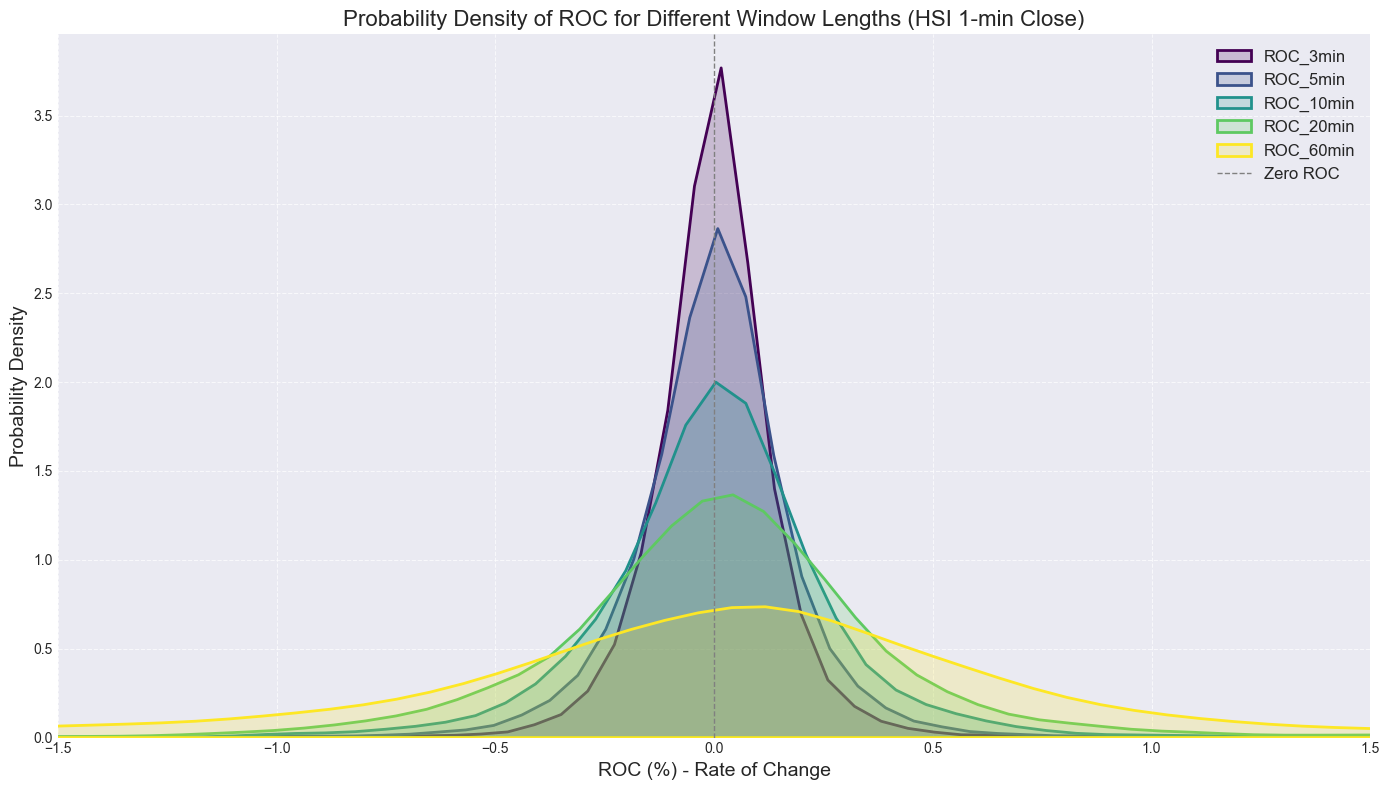

In [26]:
# --- 2. Define ROC Windows and Calculate ROCs ---
roc_windows_to_compare = [3, 5, 10, 20, 60]  # e.g., 5-min, 10-min, 20-min, 1-hour ROC
roc_data = {} # To store ROC series for each window

for window in roc_windows_to_compare:
    roc_col_name = f'ROC_{window}min'
    hsi_df[roc_col_name] = hsi_df['close'].pct_change(periods=window) * 100
    # Store the non-NaN ROC values for plotting
    roc_data[roc_col_name] = hsi_df[roc_col_name].dropna()

print("\nSample of calculated ROCs:")
print(hsi_df[[f'ROC_{w}min' for w in roc_windows_to_compare]].tail())

# --- 3. Plot KDEs of ROCs for different windows ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 8))

colors = plt.cm.viridis(np.linspace(0, 1, len(roc_windows_to_compare)))

for i, (roc_col_name, roc_series) in enumerate(roc_data.items()):
    sns.kdeplot(roc_series, label=roc_col_name, color=colors[i], fill=True, alpha=0.2, linewidth=2)
    # You can also print percentiles for each to quantify "rare"
    q95 = roc_series.quantile(0.95)
    q85 = roc_series.quantile(0.85)
    q75 = roc_series.quantile(0.75)
    q25 = roc_series.quantile(0.25)
    q15 = roc_series.quantile(0.15)
    q05 = roc_series.quantile(0.05)
    print(f"""{roc_col_name} 
            - 5th percentile: {q05:.3f}%, 95th percentile: {q95:.3f}%
            - 15th percentile: {q15:.3f}%, 85th percentile: {q85:.3f}%
            - 25th percentile: {q25:.3f}%, 75th percentile: {q75:.3f}%
          """)


plt.title('Probability Density of ROC for Different Window Lengths (HSI 1-min Close)', fontsize=16)
plt.xlabel('ROC (%) - Rate of Change', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.axvline(0, color='grey', linestyle='--', linewidth=1, label='Zero ROC')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.7)

# Adjust x-limits if necessary to see the tails better, can be data-dependent
# For example, find the overall min/max ROC across all series to set robust limits
all_roc_values = pd.concat(list(roc_data.values()))
plot_min_roc = all_roc_values.quantile(0.001) # Show extreme 0.1% tail
plot_max_roc = all_roc_values.quantile(0.999) # Show extreme 0.1% tail
plt.xlim(max(plot_min_roc, -1.5), min(plot_max_roc, 1.5)) # Cap at +/- 1.5% or actual extremes if smaller

plt.tight_layout()
plt.show()